In [5]:
import os

buildings_train_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_train/seg_train/buildings')
forest_train_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_train/seg_train/forest')
glacier_train_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_train/seg_train/glacier')
mountain_train_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_train/seg_train/mountain')
sea_train_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_train/seg_train/sea')
street_train_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_train/seg_train/street')

buildings_test_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_test/seg_test/buildings')
forest_test_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_test/seg_test/forest')
glacier_test_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_test/seg_test/glacier')
mountain_test_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_test/seg_test/mountain')
sea_test_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_test/seg_test/sea')
street_test_dir = os.path.join('C:/Data/ImageSceneClassificationofMulticlass/seg_test/seg_test/street')

buildings_files = os.listdir(buildings_train_dir)
forest_files = os.listdir(forest_train_dir)
glacier_files = os.listdir(glacier_train_dir)
mountain_files = os.listdir(mountain_train_dir)
sea_files = os.listdir(sea_train_dir)
street_files = os.listdir(street_train_dir)

print('taining images:')
print('total train buildings images:', len(buildings_files))
print('total train forest images:', len(forest_files))
print('total train glacier images:', len(glacier_files))
print('total train mountain images:', len(mountain_files))
print('total train sea images:', len(sea_files))
print('total train street images:', len(street_files))
print('\n')
print('testing images:')
print('total test buildings images:', len(os.listdir(buildings_test_dir)))
print('total test forest images:', len(os.listdir(forest_test_dir)))
print('total test glacier images:', len(os.listdir(glacier_test_dir)))
print('total test mountain images:', len(os.listdir(mountain_test_dir)))
print('total test sea images:', len(os.listdir(sea_test_dir)))
print('total test street images:', len(os.listdir(street_test_dir)))




taining images:
total train buildings images: 1000
total train forest images: 1000
total train glacier images: 1000
total train mountain images: 1000
total train sea images: 1000
total train street images: 1000


testing images:
total test buildings images: 200
total test forest images: 200
total test glacier images: 200
total test mountain images: 200
total test sea images: 200
total test street images: 200


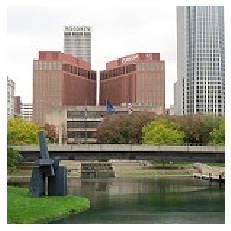

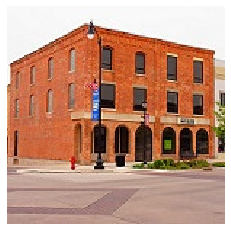

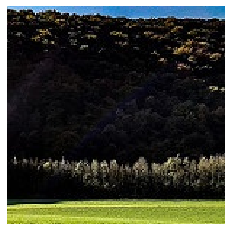

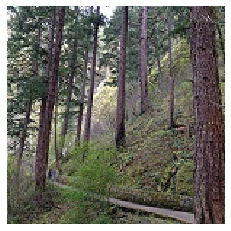

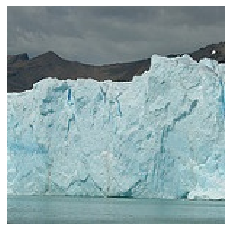

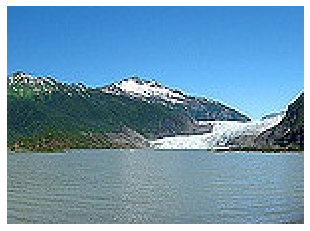

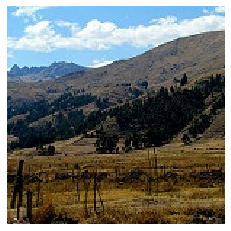

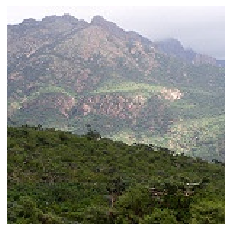

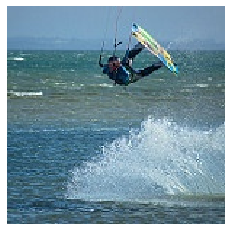

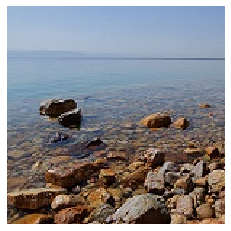

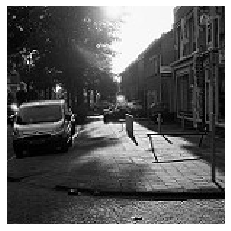

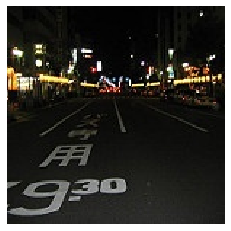

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#plot 
pic_index = 4

next_building = [os.path.join(buildings_train_dir, fname) 
                for fname in buildings_files[pic_index-2:pic_index]]
next_forest = [os.path.join(forest_train_dir, fname) 
                for fname in forest_files[pic_index-2:pic_index]]
next_glacier = [os.path.join(glacier_train_dir, fname) 
                for fname in glacier_files[pic_index-2:pic_index]]
next_mountain = [os.path.join(mountain_train_dir, fname) 
                for fname in mountain_files[pic_index-2:pic_index]]
next_sea = [os.path.join(sea_train_dir, fname) 
                for fname in sea_files[pic_index-2:pic_index]]
next_street = [os.path.join(street_train_dir, fname) 
                for fname in street_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_building+next_forest+next_glacier+next_mountain+next_sea+next_street):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [8]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "C:/Data/ImageSceneClassificationofMulticlass/seg_train/seg_train/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "C:/Data/ImageSceneClassificationofMulticlass/seg_test/seg_test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical'
)

Found 6000 images belonging to 6 classes.
Found 1200 images belonging to 6 classes.


In [9]:
model = tf.keras.models.Sequential([
    # input shape is thesize of the image, 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
     #Applies Dropout to the input to prevent overfitting
    tf.keras.layers.Dropout(0.4),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=40, validation_data = validation_generator, verbose = 1)

model.save("SceneClassificationModel.h5")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

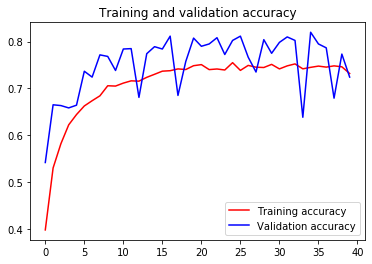

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

from the plot above it seems that more training data is required but due to owning old laptop i have stopped here.
below some predictions

In [11]:
import numpy as np
from keras.preprocessing import image

Using TensorFlow backend.


The Image:



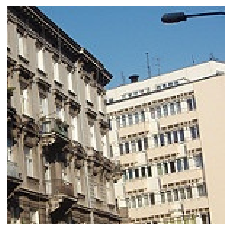

The prediction:

[[1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  6.310423e-12]] 

The Image:



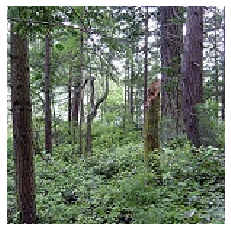

The prediction:

[[0. 1. 0. 0. 0. 0.]] 

The Image:



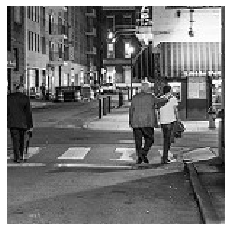

The prediction:

[[0. 0. 0. 0. 0. 1.]] 



In [17]:
Images = ['C:/Data/ImageSceneClassificationofMulticlass/seg_pred/seg_pred/351.jpg',
          'C:/Data/ImageSceneClassificationofMulticlass/seg_pred/seg_pred/549.jpg',
          'C:/Data/ImageSceneClassificationofMulticlass/seg_pred/seg_pred/1987.jpg']
for path in Images:
    print('The Image:\n')
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

    print('The prediction:\n')
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes, '\n')